In [0]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import statistics
from sklearn.model_selection import LeaveOneOut
import matplotlib.pyplot as plt
from scipy.spatial import distance


data = datasets.load_iris()

X,y = data.data, data.target

In [0]:
def eliminacao_seq(train_x, train_y, n_neighbors):

    k = 0
    removed_count = 0

    while k < len(train_x):

        # print(k, train_x[k])
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=distance.euclidean)
        # removes current item from train data
        removed_x = train_x[k]
        removed_y = train_y[k]
        train_x = np.delete(train_x, k, axis=0)
        train_y = np.delete(train_y, k, axis=0)

        knn.fit(train_x, train_y)
        pred = knn.predict([removed_x])

        if pred != removed_y:
        
            # inserts the removed item back at its the very same position
            train_x = np.insert(train_x, k, removed_x, axis=0)
            train_y = np.insert(train_y, k, removed_y, axis=0)
            k += 1
        else:
            removed_count += 1

    print('Total removed:', removed_count)
    return train_x, train_y

In [0]:
def insercao_seq(train_x, train_y):

    added_count = 0
    new_train_x = [train_x[0, :]]
    new_train_y = [train_y[0]]

    for k in range(1, len(train_x)):

        knn = KNeighborsClassifier(n_neighbors=1, metric=distance.euclidean)

        knn.fit(new_train_x, new_train_y)

        pred = knn.predict([train_x[k]])

        if pred != train_y[k]:
            # inserts the removed item back at its the very same position
            new_train_x.append(train_x[k, :])
            new_train_y.append(train_y[k])
            added_count += 1

    print('Total added:', added_count)

    return new_train_x, new_train_y

**Random subsampling (10 vezes)**

In [0]:
'''from sklearn.utils import shuffle


iris = datasets.load_iris()

print(np.shape(iris.data), np.shape(iris.target))

X, y = shuffle(iris.data, iris.target, random_state=0)

X, y = insercao_seq(X, y)

print(np.shape(X), np.shape(y))'''


'from sklearn.utils import shuffle\n\n\niris = datasets.load_iris()\n\nprint(np.shape(iris.data), np.shape(iris.target))\n\nX, y = shuffle(iris.data, iris.target, random_state=0)\n\nX, y = insercao_seq(X, y)\n\nprint(np.shape(X), np.shape(y))'

In [0]:
iris = datasets.load_iris()

print(np.shape(iris.data), np.shape(iris.target))

X, y = shuffle(iris.data, iris.target, random_state=0)

X, y = eliminacao_seq(X, y, 7)

print(np.shape(X), np.shape(y))

(150, 4) (150,)
Total removed: 138
(12, 4) (12,)


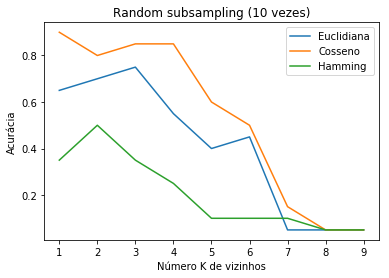

In [0]:
k_vals = range(1, 10)
mean_ac = []

for k in k_vals:

    neigh = KNeighborsClassifier(n_neighbors=k, metric=distance.euclidean)
    neigh2 = KNeighborsClassifier(n_neighbors=k, metric=distance.cosine)
    neigh3 = KNeighborsClassifier(n_neighbors=k, metric=distance.hamming)

    val_ac = []

    for i in range(0, 10):
      
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i)
        
        neigh.fit(X_train, y_train)
        neigh2.fit(X_train, y_train)
        neigh3.fit(X_train, y_train)

        pred = neigh.predict(X_test)
        ac = accuracy_score(y_test, pred)

        pred2 = neigh2.predict(X_test)
        ac2 = accuracy_score(y_test, pred2)

        pred3 = neigh3.predict(X_test)
        ac3 = accuracy_score(y_test, pred3)

        val_ac.append([ac, ac2, ac3])

    # print('Acuracia com %i: %s'%(k,statistics.mean(val_ac[0])))
    # print(np.shape(val_ac))
    mean_ac.append(np.mean(val_ac, axis=0))
    # print(np.shape(mean_ac))

mean_ac = np.transpose(mean_ac)

plt.plot(k_vals, mean_ac[0])
plt.plot(k_vals, mean_ac[1])
plt.plot(k_vals, mean_ac[2])

plt.title('Random subsampling (10 vezes)')
plt.ylabel('Acurácia')
plt.xlabel('Número K de vizinhos')
plt.legend(['Euclidiana', 'Cosseno', 'Hamming'])


plt.show()


**10-fold cross validation**

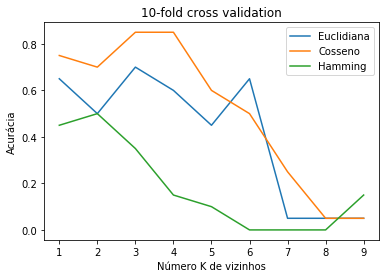

In [0]:
X, y = np.array(X), np.array(y)


k_vals = range(1, 10)
mean_ac = []

for k in k_vals:
  
  neigh = KNeighborsClassifier(n_neighbors=k, metric=distance.euclidean)
  neigh2 = KNeighborsClassifier(n_neighbors=k, metric=distance.cosine)
  neigh3 = KNeighborsClassifier(n_neighbors=k, metric=distance.hamming)
  
  val_ac = []
  kf = KFold(10, shuffle=True, random_state=1)
  
  for train_index,teste_index in kf.split(X,y):
  
    X_train, X_test = X[train_index],X[teste_index]
    y_train, y_test = y[train_index], y[teste_index]
    neigh.fit(X_train,y_train)
    pred = neigh.predict(X_test)
    
    neigh2.fit(X_train, y_train)
    neigh3.fit(X_train, y_train)

    pred = neigh.predict(X_test)
    ac = accuracy_score(y_test, pred)

    pred2 = neigh2.predict(X_test)
    ac2 = accuracy_score(y_test, pred2)

    pred3 = neigh3.predict(X_test)
    ac3 = accuracy_score(y_test, pred3)

    val_ac.append([ac, ac2, ac3])

    # print('Acuracia com %i: %s'%(k,statistics.mean(val_ac[0])))
    
  mean_ac.append(np.mean(val_ac, axis=0))

mean_ac = np.transpose(mean_ac)

plt.plot(k_vals, mean_ac[0])
plt.plot(k_vals, mean_ac[1])
plt.plot(k_vals, mean_ac[2])

plt.title('10-fold cross validation')
plt.ylabel('Acurácia')
plt.xlabel('Número K de vizinhos')
plt.legend(['Euclidiana', 'Cosseno', 'Hamming'])

plt.show()

**Leave-one-out**

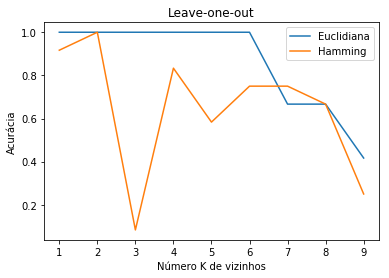

In [0]:


k_vals = range(1, 10)
mean_ac = []

loo = LeaveOneOut()
loo.get_n_splits(X)


for k in k_vals:
  
  neigh = KNeighborsClassifier(n_neighbors=k, metric=distance.euclidean)
  neigh2 = KNeighborsClassifier(n_neighbors=k, metric=distance.cosine)
  neigh3 = KNeighborsClassifier(n_neighbors=k, metric=distance.hamming)
    
  val_ac = []
  kf = KFold(10, shuffle=True, random_state=1)
  
  for train_index, test_index in loo.split(X):
    
    X_train, X_test = X[train_index],X[teste_index]
    y_train, y_test = y[train_index], y[teste_index]
    
    neigh.fit(X_train,y_train)
    pred = neigh.predict(X_test)
    
    neigh2.fit(X_train, y_train)
    neigh3.fit(X_train, y_train)

    pred = neigh.predict(X_test)
    ac = accuracy_score(y_test, pred)

    pred2 = neigh2.predict(X_test)
    ac2 = accuracy_score(y_test, pred2)

    pred3 = neigh3.predict(X_test)
    ac3 = accuracy_score(y_test, pred3)

    val_ac.append([ac, ac2, ac3])

    # print('Acuracia com %i: %s'%(k,statistics.mean(val_ac[0])))
    # print(np.shape(val_ac))
    
  mean_ac.append(np.mean(val_ac, axis=0))

mean_ac = np.transpose(mean_ac)

plt.plot(k_vals, mean_ac[0])
plt.plot(k_vals, mean_ac[1])
plt.plot(k_vals, mean_ac[2])

plt.title('Leave-one-out')
plt.ylabel('Acurácia')
plt.xlabel('Número K de vizinhos')
plt.legend(['Euclidiana', 'Cosseno', 'Hamming'])


plt.show()
  

**Inserlçao seqeuncial:**

**Eliminação seqeuncial**